In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
df = pd.read_csv("energydata_complete.csv")

# Getting a feel of the dataset

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#rename columns
column_names = {"T1":"Kitchen_T", "RH_1":"Kitchen_RH", "T2":"Livingroom_T", "RH_2":"Livingroom_RH",
                "T3":"Laundry_T", "RH_3":"Laundry_RH", "T4":"Office_T", "RH_4":"Office_RH",
                "T5":"Bathroom_T","RH_5":"Bathroom_RH", "T6":"OutsideBuilding_T", "RH_6":"OutsideBuilding_RH",
                "T7":"Ironingroom_T", "RH_7":"Ironingroom_RH", "T8":"Teenroom_T", "RH_8":"Teenroom_RH",
                "T9":"Parentroom_T", "RH_9":"Parentroom_RH", "T_out":"Outside_T", "RH_out":"Outside_RH",}
df = df.rename(columns=column_names)
df.head()

,date,Appliances,lights,Kitchen_T,Kitchen_RH,Livingroom_T,Livingroom_RH,Laundry_T,Laundry_RH,Office_T,...,Parentroom_T,Parentroom_RH,Outside_T,Press_mm_hg,Outside_RH,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.shape

(19735, 29)

In [6]:
df.describe()

,Appliances,lights,Kitchen_T,Kitchen_RH,Livingroom_T,Livingroom_RH,Laundry_T,Laundry_RH,Office_T,Office_RH,...,Parentroom_T,Parentroom_RH,Outside_T,Press_mm_hg,Outside_RH,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                19735 non-null  object 
 1   Appliances          19735 non-null  int64  
 2   lights              19735 non-null  int64  
 3   Kitchen_T           19735 non-null  float64
 4   Kitchen_RH          19735 non-null  float64
 5   Livingroom_T        19735 non-null  float64
 6   Livingroom_RH       19735 non-null  float64
 7   Laundry_T           19735 non-null  float64
 8   Laundry_RH          19735 non-null  float64
 9   Office_T            19735 non-null  float64
 10  Office_RH           19735 non-null  float64
 11  Bathroom_T          19735 non-null  float64
 12  Bathroom_RH         19735 non-null  float64
 13  OutsideBuilding_T   19735 non-null  float64
 14  OutsideBuilding_RH  19735 non-null  float64
 15  Ironingroom_T       19735 non-null  float64
 16  Iron

In [8]:
#select a sample of the dataset
simple_linear_reg_df = df[["Livingroom_T", 'OutsideBuilding_T']].sample(15, random_state=2)

<AxesSubplot:xlabel='Livingroom_T', ylabel='OutsideBuilding_T'>

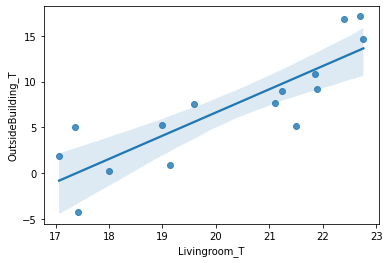

In [9]:
#regression plot
sns.regplot(x="Livingroom_T", y="OutsideBuilding_T", data=simple_linear_reg_df)

In [10]:
'''From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) 
and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?'''

from sklearn.metrics import r2_score
l = df["Livingroom_T"]
o = df['OutsideBuilding_T']
r2 = r2_score(l, o)
round(r2,2)

-35.39

# Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

In [11]:
#drop the date column
df = df.drop(['date', 'lights'], axis = 1)

In [12]:
#normalise the dataset to a common scale using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
app_target = normalised_df["Appliances"]

In [13]:
#split into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(normalised_df, app_target, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model on the training dataset 
linear_model.fit(X_train, Y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)

What is the Mean Absolute Error (in two decimal places)?

In [15]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predicted_values)
round(mae,2)

0.0

What is the Residual Sum of Squares (in two decimal places)?

In [16]:
#rss
from sklearn.metrics import mean_squared_error
rss = np.sqrt(mean_squared_error(Y_test, predicted_values))
round(rss, 2)

0.0

What is the Root Mean Squared Error (in three decimal places)?

In [17]:
#rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted_values))
round(rmse, 3)

0.0

What is the Coefficient of Determination (in two decimal places)?

In [18]:
#coefficient of determination is the same as r2_score
r2_score = r2_score(Y_test, predicted_values)
round(r2_score, 2)

1.0

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [19]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, X_train, "Linear_Model_Weight")

In [20]:
linear_model_weights

,Features,Linear_Model_Weight
0,Livingroom_T,-1.861447e-16
1,Livingroom_RH,-1.531850e-16
2,Windspeed,-8.173905e-17
3,Laundry_RH,-5.183641e-17
4,Kitchen_T,-3.260983e-17
5,Outside_T,-2.648104e-17
6,rv1,-2.228615e-17
7,rv2,-2.228615e-17
8,Laundry_T,-2.087485e-17
9,Parentroom_T,-5.679111e-18


Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [21]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, Y_train)
pred = ridge_reg.predict(X_test)

In [22]:
#rmse
rmse = np.sqrt(mean_squared_error(Y_test, pred))
round(rmse, 3)

0.0

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [23]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [24]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df
lasso_weights = get_weights_df(lasso_reg, X_train, "Lasso_Weight")

In [25]:
lasso_weights

,Features,Lasso_Weight
0,Ironingroom_T,0.000000
1,Tdewpoint,0.000000
2,Visibility,0.000000
3,Windspeed,0.000000
4,Outside_RH,-0.000000
5,Press_mm_hg,-0.000000
6,Outside_T,0.000000
7,Parentroom_RH,-0.000000
8,Parentroom_T,0.000000
9,Teenroom_RH,-0.000000


What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [26]:
pred1 = lasso_reg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(Y_test, pred1))
round(rmse, 3)

0.01